In [128]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_absolute_percentage_error,r2_score
from pmdarima import auto_arima
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [129]:
df_old = pd.read_csv('datasets/Ibovespa14anos.csv')
df = pd.read_csv('datasets/Ibovespa4anos.csv')
display(df.head(20))

,Data,Último,Abertura,Máxima,Mínima,Vol.,Var%
0,24.05.2024,124.306,124.731,125.257,124.259,"9,21M","-0,34%"
1,23.05.2024,124.729,125.650,125.665,124.431,"9,99M","-0,73%"
2,22.05.2024,125.650,127.412,127.412,125.524,"12,40M","-1,38%"
3,21.05.2024,127.412,127.754,128.272,127.205,"9,14M","-0,27%"
4,20.05.2024,127.751,128.151,128.730,127.488,"9,34M","-0,31%"
5,17.05.2024,128.151,128.280,128.464,127.696,"10,26M","-0,10%"
6,16.05.2024,128.284,128.029,128.965,127.922,"9,86M","0,20%"
7,15.05.2024,128.028,128.514,128.646,127.029,"10,86M","-0,38%"
8,14.05.2024,128.515,128.155,128.965,127.962,"11,89M","0,28%"
9,13.05.2024,128.155,127.600,128.669,127.599,"8,92M","0,44%"


In [130]:
df_data = df[['Data','Último']]

In [131]:
df_data.head()

,Data,Último
0,24.05.2024,124.306
1,23.05.2024,124.729
2,22.05.2024,125.650
3,21.05.2024,127.412
4,20.05.2024,127.751


In [132]:
df_data.rename(columns={'Data':'ds','Último':'y'},inplace=True)

C:\Users\rpjun\AppData\Local\Temp\ipykernel_6860\2873202314.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data.rename(columns={'Data':'ds','Último':'y'},inplace=True)


In [133]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1094 entries, 0 to 1093
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      1094 non-null   object 
 1   y       1094 non-null   float64
dtypes: float64(1), object(1)
memory usage: 17.2+ KB


In [134]:
df_data['ds'] = pd.to_datetime(df_data['ds'])

C:\Users\rpjun\AppData\Local\Temp\ipykernel_6860\1635830987.py:1: UserWarning: Parsing dates in %d.%m.%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  df_data['ds'] = pd.to_datetime(df_data['ds'])
C:\Users\rpjun\AppData\Local\Temp\ipykernel_6860\1635830987.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_data['ds'] = pd.to_datetime(df_data['ds'])


In [135]:
df_data.set_index('ds', inplace=True)

In [136]:
model = auto_arima(df_data['y'], seasonal=False, trace=True)
print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=4203.069, Time=0.53 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=4216.915, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=4203.079, Time=0.06 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=4204.883, Time=0.12 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=4214.926, Time=0.02 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=4202.462, Time=0.52 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=4200.787, Time=0.12 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=4202.335, Time=0.13 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=4203.296, Time=0.17 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=4201.150, Time=0.79 sec
 ARIMA(0,1,2)(0,0,0)[0]             : AIC=4198.799, Time=0.15 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=4202.898, Time=0.05 sec
 ARIMA(1,1,2)(0,0,0)[0]             : AIC=4200.472, Time=0.23 sec
 ARIMA(0,1,3)(0,0,0)[0]             : AIC=4200.346, Time=0.06 sec
 ARIMA(1,1,1)(0,0,0)[0]          

In [143]:
def arima_forecast(history):
    model = ARIMA(history, order=(0,1,2))
    model_fit = model.fit()
    output = model_fit.forecast()
    yhat = output[0]
    return yhat

In [144]:
X = df_data.values
size = int(len(X) * 0.8)
train, test = X[0:size], X[size:len(X)]

In [145]:
history = [x for x in train]
predictions = list()
for t in range(len(test)):
    yhat = arima_forecast(history)
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)

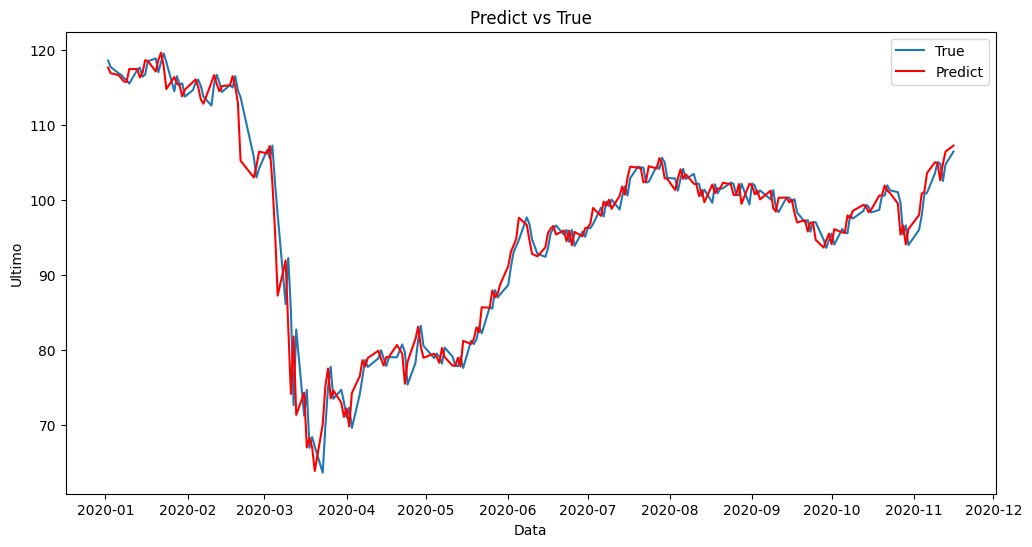

In [146]:
plt.figure(figsize=(12, 6), dpi=100)
plt.plot(df_data.iloc[size:,:].index, test, label='True')
plt.plot(df_data.iloc[size:,:].index, predictions, color='red', label='Predict')
plt.title('Predict vs True')
plt.xlabel('Data')
plt.ylabel('Ultimo')
plt.legend()
plt.show()

In [152]:
r2 = r2_score(test, predictions)
mae = mean_absolute_error(test, predictions)
mse =mean_squared_error(test, predictions)
print(f"{r2.round(2)*100}%")

96.0%
